## Wine Quality Dataset - Meyhaa Buvanesh

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import random as rn
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## Loading Data

In [2]:
# Wine Quality Data Set
wine = pd.read_csv('data/winequality-red.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Transforming Data

### Wine Quality Dataset

In [3]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_qual = LabelEncoder()
wine['quality'] = label_qual.fit_transform(wine['quality'])

In [4]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Classifiers

In [5]:
# To keep track of accuracies across the different classifiers for each of the Datasets
Wine_LR_acc = []
Wine_SVM_acc = []
Wine_RF_acc = []
Wine_RF_CV_acc = []
Wine_KNN_acc = []

In [6]:
def logistic_regression(X_train, X_test, Y_train, Y_test):
    LR = LogisticRegression()
    LR.fit(X_train, Y_train)
    LR_acc = LR.score(X_test, Y_test)
    return LR_acc

In [7]:
def svm(X_train, X_test, Y_train, Y_test):
    SVM = SVC()
    SVM.fit(X_train, Y_train)
    SVM_acc = SVM.score(X_test, Y_test)
    return SVM_acc

In [8]:
def random_forest(X_train, X_test, Y_train, Y_test):
    RFC = RandomForestClassifier(n_estimators = 200)
    RFC.fit(X_train, Y_train)
    RFC_acc = RFC.score(X_test, Y_test)
    RF_eval = cross_val_score(estimator = RFC, X = X_train, y = Y_train, cv = 10)
    return RFC_acc, RF_eval.mean()

### Data Shuffle 1: 80/20 Split

#### Wine Quality Dataset

In [9]:
X_wine = wine.drop('quality', axis = 1)
Y_wine = wine['quality']

In [10]:
# Splitting the Data 
X_wine_train1, X_wine_test1, Y_wine_train1, Y_wine_test1 = train_test_split(X_wine, Y_wine,
                                                                             test_size = 0.2, 
                                                                             shuffle = True)

In [11]:
# Logistic Regression for Wine Dataset 
LR_wine1_acc = logistic_regression(X_wine_train1, X_wine_test1, Y_wine_train1, Y_wine_test1)
Wine_LR_acc.append(LR_wine1_acc)
Wine_LR_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.871875]

In [12]:
# SVM For Wine Dataset
SVM_wine1_acc = svm(X_wine_train1, X_wine_test1, Y_wine_train1, Y_wine_test1)
Wine_SVM_acc.append(SVM_wine1_acc)
Wine_SVM_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.86875]

In [13]:
# Random Forest for Wine Dataset
RF_wine1_acc = random_forest(X_wine_train1, X_wine_test1, Y_wine_train1, Y_wine_test1)
Wine_RF_acc.append(RF_wine1_acc[0])
Wine_RF_CV_acc.append(RF_wine1_acc[1])

In [14]:
Wine_RF_acc

[0.903125]

In [15]:
Wine_RF_CV_acc

[0.9078204159799792]

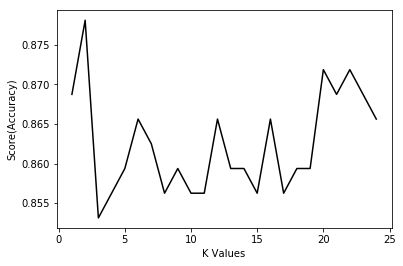

In [16]:
# KNN Model for Wine Dataset
scores = []
for val in range(1,25):
    KNNfind = KNeighborsClassifier(n_neighbors = val)
    KNNfind.fit(X_wine_train1,Y_wine_train1)
    scores.append(KNNfind.score(X_wine_test1,Y_wine_test1))

plt.plot(range(1,25),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [17]:
Wine_KNN_acc.append(max(scores))
Wine_KNN_acc

[0.878125]

In [18]:
'Optimal n is: ' + str(scores.index(max(scores))+ 1)

'Optimal n is: 2'

### Data Shuffle 2: 50/50 Split

#### Wine Quality Dataset

In [19]:
# Splitting the Data 
X_wine_train2, X_wine_test2, Y_wine_train2, Y_wine_test2 = train_test_split(X_wine, Y_wine,
                                                                             test_size = 0.5, 
                                                                             shuffle = True)

In [20]:
# Logistic Regression for Wine Dataset 
LR_wine2_acc = logistic_regression(X_wine_train2, X_wine_test2, Y_wine_train2, Y_wine_test2)
Wine_LR_acc.append(LR_wine2_acc)
Wine_LR_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.871875, 0.87125]

In [21]:
# SVM For Wine Dataset
SVM_wine2_acc = svm(X_wine_train2, X_wine_test2, Y_wine_train2, Y_wine_test2)
Wine_SVM_acc.append(SVM_wine2_acc)
Wine_SVM_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.86875, 0.86875]

In [22]:
# Random Forest for Wine Dataset
RF_wine2_acc = random_forest(X_wine_train2, X_wine_test2, Y_wine_train2, Y_wine_test2)
Wine_RF_acc.append(RF_wine2_acc[0])
Wine_RF_CV_acc.append(RF_wine2_acc[1])
Wine_RF_acc, Wine_RF_CV_acc

([0.903125, 0.8975], [0.9078204159799792, 0.9037865291451789])

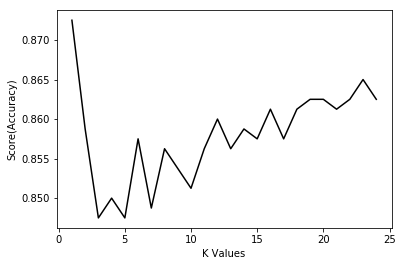

In [23]:
scores2 = []
for val in range(1,25):
    KNNfind = KNeighborsClassifier(n_neighbors = val)
    KNNfind.fit(X_wine_train2,Y_wine_train2)
    scores2.append(KNNfind.score(X_wine_test2,Y_wine_test2))

plt.plot(range(1,25),scores2,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [24]:
Wine_KNN_acc.append(max(scores2))
Wine_KNN_acc

[0.878125, 0.8725]

In [25]:
'Optimal n is: ' + str(scores2.index(max(scores2))+ 1)

'Optimal n is: 1'

### Data Shuffle 3: 20/80 Split

#### Wine Quality Dataset

In [26]:
# Splitting the Data 
X_wine_train3, X_wine_test3, Y_wine_train3, Y_wine_test3 = train_test_split(X_wine, Y_wine,
                                                                             test_size = 0.8, 
                                                                             shuffle = True)

In [27]:
# Logistic Regression For Wine Dataset
LR_wine3_acc = logistic_regression(X_wine_train3, X_wine_test3, Y_wine_train3, Y_wine_test3)
Wine_LR_acc.append(LR_wine3_acc)
Wine_LR_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.871875, 0.87125, 0.87734375]

In [28]:
# SVM For Wine Dataset
SVM_wine3_acc = svm(X_wine_train3, X_wine_test3, Y_wine_train3, Y_wine_test3)
Wine_SVM_acc.append(SVM_wine3_acc)
Wine_SVM_acc

/Users/Meyhaa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.86875, 0.86875, 0.86875]

In [29]:
# GridSearchCV 
# [0.1, 1, 10, 100]
# [10e-7, 10e-6, 10e-5, 10e-4]

classifier = SVC()
param = {
    'C': [0.1, 1, 10, 100],
    'kernel':['linear', 'rbf'],
    'gamma' :[10e-7, 10e-6, 10e-5, 10e-4]
}
grid_wine_svm = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=5)
grid_wine_svm.fit(X_wine_train3, Y_wine_train3)
grid_wine_svm.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [30]:
# Running SVM with the best params from grid search
grid_SVM_wine_acc = grid_wine_svm.best_estimator_.score(X_wine_test3, Y_wine_test3)
grid_SVM_wine_acc

0.86953125

In [31]:
# Random Forest for Wine Dataset
RF_wine3_acc = random_forest(X_wine_train3, X_wine_test3, Y_wine_train3, Y_wine_test3)
Wine_RF_acc.append(RF_wine3_acc[0])
Wine_RF_CV_acc.append(RF_wine3_acc[1])
Wine_RF_acc, Wine_RF_CV_acc

([0.903125, 0.8975, 0.89375],
 [0.9078204159799792, 0.9037865291451789, 0.8777217741935484])

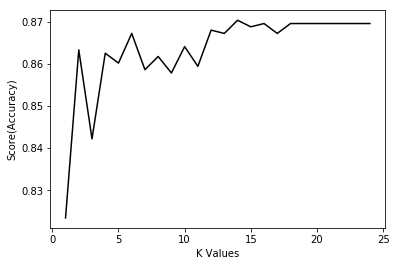

In [32]:
scores3 = []
for val in range(1,25):
    KNNfind = KNeighborsClassifier(n_neighbors = val)
    KNNfind.fit(X_wine_train3,Y_wine_train3)
    scores3.append(KNNfind.score(X_wine_test3,Y_wine_test3))

plt.plot(range(1,25),scores3,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [33]:
Wine_KNN_acc.append(max(scores3))
Wine_KNN_acc

[0.878125, 0.8725, 0.8703125]

In [34]:
'Optimal n is: ' + str(scores3.index(max(scores3))+ 1)

'Optimal n is: 14'

### Accuracies

#### Logistic Regression

In [35]:
Wine_LR_acc

[0.871875, 0.87125, 0.87734375]

In [36]:
# Average
round(mean(Wine_LR_acc), 4)

0.8735

#### SVM

In [38]:
Wine_SVM_acc

[0.86875, 0.86875, 0.86875]

In [39]:
# Average
round(mean(Wine_SVM_acc), 4)

0.8688

#### Random Forest

In [40]:
Wine_RF_acc

[0.903125, 0.8975, 0.89375]

In [41]:
# Average
round(mean(Wine_RF_acc), 4)

0.8981

In [42]:
# With Cross Validation
Wine_RF_CV_acc

[0.9078204159799792, 0.9037865291451789, 0.8777217741935484]

In [43]:
#Average
round(mean(Wine_RF_CV_acc), 4)

0.8964

#### KNN

In [44]:
Wine_KNN_acc

[0.878125, 0.8725, 0.8703125]

In [46]:
# Average
round(mean(Wine_KNN_acc), 4)

0.8736